In [1]:
from __future__ import print_function, division

#importing pandas for reading and parsing of tabulated data
import pandas as pd
#importing geopandas read to plot geographical information
import geopandas as gpd
#importing fiona to handle geographical coordinates
import fiona
#import shapely to handle geographical shapes
import shapely

import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas.io.gbq import read_gbq

## Parks

In [3]:
cd ..

/Users/ingridspielman/Desktop/nytimes


In [4]:
parks = gpd.GeoDataFrame.from_file("smart_cities/NYC_shapefiles/Parks Properties.geojson")

In [19]:
parks.crs
park_proj = parks.to_crs({'init': u'epsg:2263'})
park_proj.crs

{'init': u'epsg:2263'}

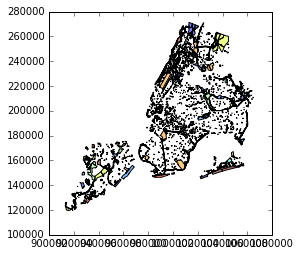

In [24]:
park_proj.plot()

## Zipcodes

In [5]:
zipcodes = gpd.GeoDataFrame.from_file("smart_cities/NYC_shapefiles/ZIP_CODE_040114/ZIP_CODE_040114.shp")

In [36]:
zipcodes_proj = zipcodes.to_crs({'init': u'epsg:2263'})

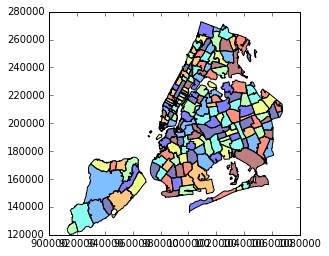

In [23]:
zipcodes.plot()

## Area overlaps of zipcodes and Parks

In [26]:
!pip install rtree

In [29]:
res_intersection = gpd.overlay(zipcodes.head(50), park_proj.head(), how='intersection')

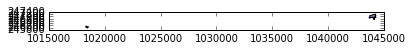

In [39]:
res_intersection.plot()

In [40]:
res_intersection.head()

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,...,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode,geometry
0,1.158795e+07,0,Bronx,005,4438.0,Bronx,0.0,0.0,NY,36,...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,Ambrosini Field,Recreation Field/Courts,14,Yes,10464,"POLYGON ((1044163.58699038 246766.6133906163, ..."
1,3.515567e+07,0,Bronx,005,56670.0,Bronx,0.0,0.0,NY,36,...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,River Garden,Garden,15,Yes,10460,"POLYGON ((1018493.260897728 246060.4564194266,..."


In [32]:
gpd.__version__

u'0.2.1'

In [37]:
zipcodes_proj.columns

Index([      u'AREA',    u'BLDGZIP',     u'COUNTY',   u'CTY_FIPS',
       u'POPULATION',    u'PO_NAME', u'SHAPE_AREA',  u'SHAPE_LEN',
            u'STATE',    u'ST_FIPS',        u'URL',    u'ZIPCODE',
         u'geometry'],
      dtype='object')

In [38]:
park_proj.columns

Index([     u'acres',    u'address',    u'borough', u'communityb',
       u'councildis',   u'geometry', u'gispropnum',   u'location',
       u'nys_assemb', u'nys_senate',   u'signname', u'typecatego',
       u'us_congres', u'waterfront',    u'zipcode'],
      dtype='object')

In [35]:
res_intersection.columns

Index([      u'AREA',    u'BLDGZIP',     u'COUNTY',   u'CTY_FIPS',
       u'POPULATION',    u'PO_NAME', u'SHAPE_AREA',  u'SHAPE_LEN',
            u'STATE',    u'ST_FIPS',        u'URL',    u'ZIPCODE',
            u'acres',    u'address',    u'borough', u'communityb',
       u'councildis', u'gispropnum',   u'location', u'nys_assemb',
       u'nys_senate',   u'signname', u'typecatego', u'us_congres',
       u'waterfront',    u'zipcode',   u'geometry'],
      dtype='object')

## Zillow Data

In [6]:
zipcodes_nyc = [
    '10001',    '10002',
    '10003',    '10004',    '10005',
    '10006',    '10007',    '10009',    '10010', '10011',
    '10012',
    '10013',
    '10014',  '10016',
    '10017',
    '10018',
    '10019',
    '10020',
    '10021',
    '10022',
    '10023',
    '10024',
    '10025',
    '10026',   '10027',
    '10028',    '10029',
    '10030',    '10031',
    '10032',    '10033',
    '10034',    '10035',
    '10036',    '10037',
    '10038',    '10039',
    '10040',
    '10044',
    '10048',
    '10065',
    '10069',
    '10075',
    '10111',
    '10115',
    '10128',
    '10280',
    '10281',
    '10282',
    '10301',
    '10302',
    '10303',
    '10304',
    '10305',
    '10306',
    '10307',
    '10308',
    '10309',
    '10310',
    '10312',
    '10314',
    '10451',
    '10452',
    '10453',
    '10454',
    '10455',
    '10456',
    '10457',
    '10458',
    '10459',
    '10460',
    '10461',
    '10462',
    '10465',
    '10466',
    '10467',
    '10468',
    '10469',
    '10470',
    '10471',
    '10472',
    '10473',
    '10474',
    '10475',
    '11001',
    '11004',
    '11005',
    '11040',
    '11096',
    '11101',
    '11102',
    '11103',
    '11104',
    '11105',
    '11106',
    '11109',
    '11201',
    '11203',
    '11204',
    '11205',
    '11206',
    '11207',
    '11208',
    '11209',
    '11210',
    '11211',
    '11212',
    '11213',
    '11214',
    '11215',
    '11216',
    '11217',
    '11218',
    '11219',
    '11220',
    '11221',
    '11222',
    '11223',
    '11224',
    '11225',
    '11226',
    '11228',
    '11229',
    '11230',
    '11231',
    '11232',
    '11233',
    '11234',
    '11235',
    '11236',
    '11237',
    '11238',
    '11239',
    '11251',
    '11354',
    '11355',
    '11356',
    '11357',
    '11358',
    '11359',
    '11360',
    '11361',
    '11362',
    '11363',
    '11364',
    '11365',
    '11366',
    '11367',
    '11368',
    '11369',
    '11371',
    '11372',
    '11373',
    '11374',
    '11375',
    '11377',
    '11378',
    '11379',
    '11385',
    '11411',
    '11412',
    '11413',
    '11414',
    '11415',
    '11416',
    '11417',
    '11418',
    '11419',
    '11420',
    '11421',
    '11422',
    '11423',
    '11426',
    '11427',
    '11428',
    '11429',
    '11430',
    '11432',
    '11433',
    '11434',
    '11435',
    '11436',
    '11451',
    '11691',
    '11692',
    '11694',
    '11697',
]
zipcodes_nyc = [int(x) for x in zipcodes_nyc]

In [7]:
from pandas.io.gbq import read_gbq  
project = "spheric-crow-161317" 
sample_query = "SELECT * FROM `smart_cities_data.median_rents_zipcode_studio`"  
studio_zip = read_gbq(query=sample_query, project_id=project, dialect='standard')
studio_zip['kind'] = 'studio'

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 87 rows.

Total time taken 0.95 s.
Finished at 2017-03-25 13:32:16.


In [11]:
sample_query = "SELECT * FROM `smart_cities_data.median_rents_zipcode_1br`"  
br1_zip = read_gbq(query=sample_query, project_id=project, dialect='standard')
br1_zip['kind'] = 'br1'

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 424 rows.

Total time taken 1.47 s.
Finished at 2017-03-25 13:32:40.


In [12]:
sample_query = "SELECT * FROM `smart_cities_data.median_rents_zipcode_2br`"  
br2_zip = read_gbq(query=sample_query, project_id=project, dialect='standard')
br2_zip['kind'] = 'br2'
br2_zip.shape

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 619 rows.

Total time taken 1.64 s.
Finished at 2017-03-25 13:32:44.


(619, 91)

In [13]:
br2_zip = br2_zip[[u'RegionName', u'City', u'State', u'Metro', u'CountyName', u'SizeRank',
         u'_2016_01', u'_2016_02', u'_2016_03', u'_2016_04',
       u'_2016_05', u'_2016_06', u'_2016_07', u'_2016_08', u'_2016_09',
       u'_2016_10', u'_2016_11', u'_2016_12', u'_2017_01', u'kind']]

In [14]:
br1_zip = br1_zip[[u'RegionName', u'City', u'State', u'Metro', u'CountyName', u'SizeRank',
         u'_2016_01', u'_2016_02', u'_2016_03', u'_2016_04',
       u'_2016_05', u'_2016_06', u'_2016_07', u'_2016_08', u'_2016_09',
       u'_2016_10', u'_2016_11', u'_2016_12', u'_2017_01', u'kind']]

In [15]:
studio_zip = studio_zip[[u'RegionName', u'City', u'State', u'Metro', u'CountyName', u'SizeRank',
         u'_2016_01', u'_2016_02', u'_2016_03', u'_2016_04',
       u'_2016_05', u'_2016_06', u'_2016_07', u'_2016_08', u'_2016_09',
       u'_2016_10', u'_2016_11', u'_2016_12', u'_2017_01', u'kind']]

In [16]:
apt_types = pd.concat([br2_zip, br1_zip, studio_zip])

In [17]:
nyc_apts = apt_types[apt_types.RegionName.isin(zipcodes_nyc)]

In [18]:
nyc_apts.kind.value_counts()

br1       102
br2        95
studio     49
Name: kind, dtype: int64

In [20]:
nyc_apts

,RegionName,City,State,Metro,CountyName,SizeRank,_2016_01,_2016_02,_2016_03,_2016_04,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,kind
5,10038,New York,NY,New York,New York,538,4874.0,4795.0,4700.0,4790.0,4495.0,4685.0,4715.0,4612.5,4750.0,4395.0,4395.0,4447.5,4480.0,br2
8,10128,New York,NY,New York,New York,18,3272.5,3312.5,3500.0,3600.0,3295.0,3297.5,3395.0,3250.0,3612.5,3295.0,3200.0,3500.0,3200.0,br2
12,11104,New York,NY,New York,Queens,506,2400.0,2450.0,2400.0,2400.0,2500.0,2500.0,2400.0,2400.0,2500.0,2500.0,2350.0,2350.0,2300.0,br2
13,11201,New York,NY,New York,Kings,31,4300.0,4292.0,4350.0,4219.0,4190.5,4150.0,4050.0,4195.0,4500.0,4850.0,4500.0,4065.0,4075.5,br2
14,10009,New York,NY,New York,New York,16,3350.0,3390.0,3362.5,3472.5,3400.0,3422.5,3400.0,3495.0,3300.0,3400.0,3392.5,3295.0,3395.0,br2
19,10024,New York,NY,New York,New York,36,4500.0,4500.0,4425.0,4472.5,4495.0,4297.5,4195.0,4200.0,4250.0,4200.0,4200.0,4195.0,4295.0,br2
23,10027,New York,NY,New York,New York,104,2566.0,2550.0,2580.5,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2600.0,2600.0,2500.0,2611.0,br2
25,10012,New York,NY,New York,New York,451,4500.0,4495.0,4450.0,4250.0,4200.0,4000.0,3800.0,3750.0,3950.0,3950.0,4000.0,3972.5,3925.0,br2
30,11377,New York,NY,New York,Queens,51,2200.0,2150.0,2100.0,2150.0,2200.0,2200.0,2200.0,2200.0,2200.0,2195.0,2200.0,2100.0,2197.5,br2
32,11105,New York,NY,New York,Queens,479,2395.0,2300.0,2400.0,2400.0,2400.0,2337.5,2400.0,2400.0,2400.0,2300.0,2395.0,2300.0,2300.0,br2
